In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

# Define Problems :
- Sebagai Produsen Mobil Brand Baru yang ingin menjual produk mobil, agar dapat bersaing dengan harga jual di pasaran.

# Goals :
- Mendapatkan gambaran harga jual untuk mobil.
- Mendapatkan gambaran spesifikasi dan referensi untuk mobil yang dijual di pasaran.

In [2]:
df = pd.read_csv('auto_clean.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [4]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

# Handling Missing Value

In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [6]:
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())

In [7]:
df['horsepower-binned'] = df['horsepower-binned'].fillna('High')

In [8]:
# Low horsepower (48 - 101)
# Medium horsepower (102 - 155)
# High horsepower (156 - 262)

# Describe Data

In [9]:
df.describe()
# Melihat describe data numerikal

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [10]:
df.describe(include='O')
# Melihat describe data non-numerikal

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


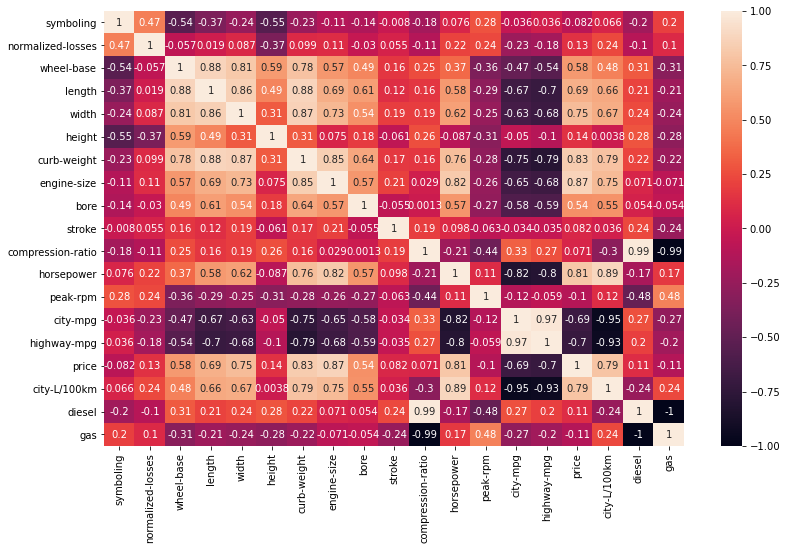

In [11]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True)
plt.show()
# Korelasi antar kolom menggunakan korelasi pearson

In [12]:
carDesc = []
for i in df.columns:
    carDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum() / len(df)) * 100),2), 
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = carDesc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])
# Describe Tiap kolom

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,symboling,int64,0,0.0,6,"[0, 1]"
1,normalized-losses,int64,0,0.0,51,"[94, 107]"
2,make,object,0,0.0,22,"[toyota, porsche]"
3,aspiration,object,0,0.0,2,"[std, turbo]"
4,num-of-doors,object,0,0.0,2,"[four, two]"
5,body-style,object,0,0.0,5,"[convertible, hardtop]"
6,drive-wheels,object,0,0.0,3,"[fwd, rwd]"
7,engine-location,object,0,0.0,2,"[rear, front]"
8,wheel-base,float64,0,0.0,52,"[91.3, 100.4]"
9,length,float64,0,0.0,73,"[0.7654973570398848, 0.8409418548774628]"


In [13]:
df.drop(columns=['symboling', 'normalized-losses'], inplace=True)
# Menghapus kolom symboling dan normalized-losses

In [14]:
df['engine-type'] = df['engine-type'].replace(['ohcf'],'ohc')
df['engine-type'] = df['engine-type'].replace(['ohcv'],'ohc')
# Mengganti ohcf dan ohcv menjadi ohc

In [15]:
df.head()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohc,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Deskripsi Kolom
- make : merk/brand mobil
- aspiration : sistem permesinan
- num-of-doors : jumlah pintu
- body-style : tipe mobil berdasarkan body
- drive-wheels : penggerak mobil
- engine-location : lokasi engine mobil
- wheel-base : jarak antara roda depan ke roda belakang
- length : panjang mobil
- width : lebar mobil
- height : tinggi mobil
- curb-weight : berat mobil
- engine-type : tipe engine mobil
- num-of-cylinders : banyaknya silinder
- engine-size : ukuran engine mobil
- fuel-system : sistem injeksi
- bore : diameter silinder
- stroke : tinggi silinder
- compression-ratio : perbandingan volume silinder
- horsepower : tenaga kuda
- peak-rpm : rotasi per menit paling maksimum
- city-mpg : mile per galon (dalam kota)
- highway-mpg : mile per galon (dalam tol)
- price : harga mobil
- city-L/100km : liter per 100 km (dalam kota)
- diesel : mobil yang menggunakan bahan bakar diesel (jika = 1)
- gas : mobil yang menggunakan bahan bakar gas (jika = 1)

In [16]:
# Untuk mencari perbandingan horsepower dengan engine size (horsepower/engine-size)
df['horsepower/engine-size'] = df['horsepower'] / df['engine-size']

In [17]:
# Mengetahui seberapa powerfull mesin yang dibuat tiap merk
df[['horsepower/engine-size','make']].groupby('make').mean().sort_values(by='horsepower/engine-size',ascending=False)

,horsepower/engine-size
make,
mercury,1.250000
saab,1.046832
porsche,1.037013
volvo,0.907611
alfa-romero,0.906950
mazda,0.889059
audi,0.879423
mitsubishi,0.874942
bmw,0.837028


In [18]:
# Mengetahui seberapa mahal harga mobil yang dibuat tiap merk
df[['price','make']].groupby('make').mean().sort_values(by='price',ascending=False)

,price
make,
jaguar,34600.000000
mercedes-benz,33647.000000
porsche,31400.500000
bmw,26118.750000
volvo,18063.181818
audi,17859.166667
mercury,16503.000000
alfa-romero,15498.333333
peugot,15489.090909


In [19]:
# Perbandingan antara mobil berbahan bakar diesel dan gas dengan harga rata-rata
pd.crosstab(index=[df['diesel'],df['gas']], columns='price', values=df['price'], aggfunc='mean')

,col_0,price
diesel,gas,
0,1,12916.40884
1,0,15838.15000


In [20]:
# Perbandingan antara mobil berbahan bakar diesel dan gas dengan keiritan bahan bakar ketika digunakan di jalan kota
pd.crosstab(index=[df['diesel'],df['gas']], columns='irit', values=df['city-mpg'], aggfunc='mean')

,col_0,irit
diesel,gas,
0,1,24.61326
1,0,30.30000


In [21]:
# Perbandingan antara mobil berbahan bakar diesel dan gas dengan keiritan bahan bakar ketika digunakan di jalan tol
pd.crosstab(index=[df['diesel'],df['gas']], columns='irit', values=df['highway-mpg'], aggfunc='mean')

,col_0,irit
diesel,gas,
0,1,30.237569
1,0,34.750000


In [22]:
# Perbandingan tenaga (horsepower/engine-size) antara mobil berbahan bakar diesel dan gas
pd.crosstab(index=[df['diesel'],df['gas']], columns='kencengan_mana?', values = df['horsepower/engine-size'], aggfunc='mean')

,col_0,kencengan_mana?
diesel,gas,
0,1,0.841446
1,0,0.614824


In [23]:
# Perbandingan jumlah cylinders dengan harga rata-rata
df[['num-of-cylinders','price']].groupby('num-of-cylinders').mean()

,price
num-of-cylinders,
eight,38900.000000
five,22007.600000
four,10303.197452
six,23671.833333
three,5151.000000
twelve,36000.000000
two,13020.000000


In [24]:
# Perbandingan antara drive-wheels mobil dengan harga rata-rata
pd.crosstab(index=df['drive-wheels'], columns='mahalan_mana?', values = df['price'], aggfunc='mean')

col_0,mahalan_mana?
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


In [25]:
# Perbandingan antara body-style mobil dengan harga rata-rata
pd.crosstab(index=df['body-style'], columns='mahalan_mana?', values = df['price'], aggfunc='mean')

col_0,mahalan_mana?
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9957.441176
sedan,14459.755319
wagon,12371.960000


In [26]:
# Perbandingan antara engine-location mobil dengan harga rata-rata
pd.crosstab(index=df['engine-location'], columns='mahalan_mana?', values = df['price'], aggfunc='mean')

col_0,mahalan_mana?
engine-location,
front,12884.085859
rear,34528.000000


In [27]:
# Perbandingan antara engine-type mobil dengan harga rata-rata
pd.crosstab(index=df['engine-type'], columns='mahalan_mana?', values = df['price'], aggfunc='mean')

col_0,mahalan_mana?
engine-type,
dohc,18116.416667
l,14627.583333
ohc,12772.398844
rotor,13020.000000


In [28]:
# Perbandingan antara jumlah pintu mobil dengan harga rata-rata
pd.crosstab(index=df['num-of-doors'], columns='mahalan_mana?', values = df['price'], aggfunc='mean')

col_0,mahalan_mana?
num-of-doors,
four,13498.034783
two,12818.127907


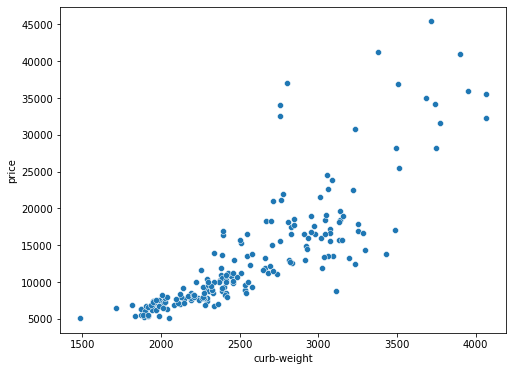

In [29]:
# Perbandingan antara jumlah curb-weight mobil dengan harga rata-rata
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['curb-weight'], y = df['price'])
plt.show()
# Semakin berat curb-weightnya maka akan semakin tinggi harganya

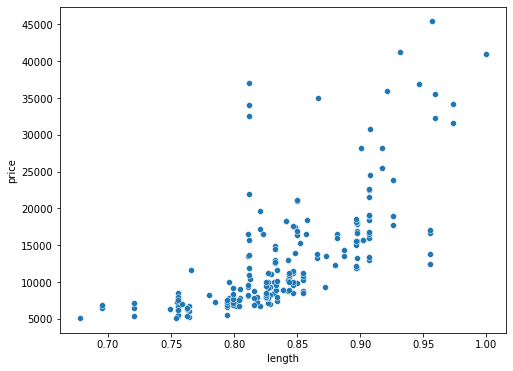

In [30]:
# Perbandingan antara length mobil dengan harga rata-rata
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['length'], y = df['price'])
plt.show()
# Tidak ada pengaruh yang signifikan antara length mobil dengan harga mobil

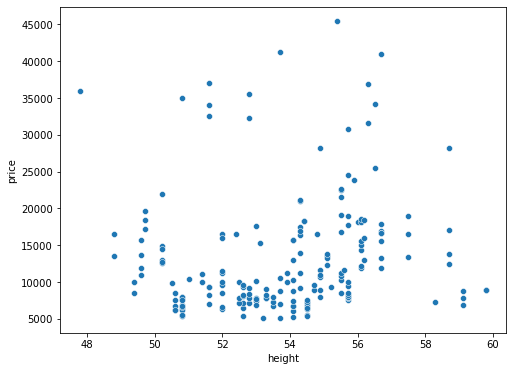

In [31]:
# Perbandingan antara height mobil dengan harga rata-rata
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['height'], y = df['price'])
plt.show()
# Tidak ada pengaruh yang signifikan antara height mobil dengan harga mobil

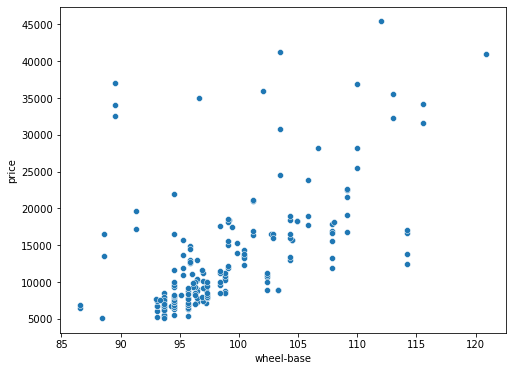

In [32]:
# Perbandingan antara wheel-base mobil dengan harga rata-rata
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['wheel-base'], y = df['price'])
plt.show()
# Tidak ada pengaruh yang signifikan antara wheel-base mobil dengan harga mobil

In [33]:
# Perbandingan antara aspiration type (std/turbo) mobil dengan harga rata-rata
pd.crosstab(index=df['aspiration'], columns='mahalan_mana?', values = df['price'], aggfunc='mean')

col_0,mahalan_mana?
aspiration,
std,12542.181818
turbo,16254.805556


In [34]:
# Perbandingan antara aspiration type (std/turbo) mobil dengan tenaga mobil (horsepower/engine-size)
pd.crosstab(index=df['aspiration'], columns='kencengan_mana?', values = df['horsepower/engine-size'], aggfunc='mean')

col_0,kencengan_mana?
aspiration,
std,0.796661
turbo,0.920811


In [35]:
# Perbandingan antara aspiration type (std/turbo) mobil dengan keiritan bahan bakar ketika melintas dijalan kota
pd.crosstab(index=df['aspiration'], columns='iritan_mana?(dikota)', values = df['city-mpg'], aggfunc='mean')

col_0,iritan_mana?(dikota)
aspiration,
std,25.745455
turbo,22.583333


In [36]:
# Perbandingan antara aspiration type (std/turbo) mobil dengan keiritan bahan bakar ketika melintas dijalan tol
pd.crosstab(index=df['aspiration'], columns='iritan_mana?(ditol)', values = df['highway-mpg'], aggfunc='mean')

col_0,iritan_mana?(ditol)
aspiration,
std,31.454545
turbo,27.166667


# Conclusion
- Top 5 Merk dengan tenaga paling tinggi (horsepower/engine-size) yaitu mercury, saab, porsche, volvo dan alfa-romero.
- Top 5 Merk dengan tenaga paling rendah (horsepower/engine-size) yaitu mercedes-benz, jaguar, isuzu, peugot, dan volkswagen.
- Mobil dengan bahan bakar gas memiliki harga mobil yang lebih rendah dibandingkan dengan mobil yang berbahan bakar diesel.
- Dari segi keiritan, mobil dengan bahan bakar diesel lebih irit dibandingkan dengan mobil berbahan bakar gas. Mobil diesel cenderung memiliki compression ratio lebih tinggi (berdasarkan data CR = 22) dibanding mobil bensin sehingga memiliki efisiensi thermal lebih baik dibanding mobil bensin. Mobil bensin memiliki limitasi untuk compression ratio karena jika terlalu tinggi compression ratio nya akan menambah kemungkinan bahan bakar terbakar sebelum waktunya (engine knocking).
- Dari segi tenaga, mobil dengan bahan bakar gas lebih bertenaga dibandingkan dengan mobil berbahan bakar diesel karena mobil berbahan bakar gas cenderung memiliki PEAK RPM lebih tinggi dibanding mobil diesel (horsepower formula = torque x RPM / 5252)
- Mayoritas untuk semakin banyak jumlah silinder yang digunakan pada tiap mobil akan meningkatkan harga mobil.
- Untuk drive-wheels dengan tipe rwd lebih mahal dibandingkan 4wd dan fwd dikarenakan mobil yang menggunakan drive-wheels digunakan oleh mobil-mobil premium, sedangkan untuk mobil yang menggunakan fwd digunakan oleh mobil-mobil yang relatif murah (hatchback)
- Untuk mobil dengan body-style hardtop dan convertible lebih mahal jika dibandingkan dengan hatchback, sedan, dan wagon.
- Untuk mobil dengan engine-location di rear harganya lebih tinggi jika dibandingkan pada lokasi di front.
- Untuk mobil dengan engine-type dohc harganya lebih tinggi jika dibandingkan dengan l, ohc, dan rotor.
- Untuk mobil dengan jumlah pintu 4 harganya lebih tinggi jika dibandingkan dengan jumlah pintu 2.
- Untuk mobil dengan curb-weight semakin berat, maka akan semakin tinggi harganya.
- Untuk spesifikasi mobil dengan length, height, wheel-base yang semakin tinggi dan tidak dipengaruhi oleh harga penjualan
- Untuk mobil dengan aspiration type turbo harganya lebih tinggi jika dibandingkan dengan aspiration type std. Banyak komponen tambahan untuk mendukung peningkatan tekanan pada silinder sehingga biaya untuk mesin yang ber-turbo lebih mahal.
- Untuk mobil dengan aspiration type turbo tenaganya lebih tinggi jika dibandingkan dengan aspiration type std. Karena pada mobil dengan turbo udara yang dihisap lebih banyak dibanding mobil standar sehingga daya yang dihasilkan lebih besar.
- Untuk mobil dengan aspiration type std keiritannya lebih baik jika dibandingkan dengan aspiration type turbo. Udara yang masuk lebih besar harus diimbangi dengan jumlah bahan bakar yang masuk sehingga keiritan mobil turbo menurun.

# Recommendation
- Berdasarkan dari pengolahan Exploratory Data Analysis, maka kami mengambil kesimpulan bahwa features yang mempengaruhi harga mobil yaitu make, aspiration, num-of-doors, body-style, drive-wheels, engine-location, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, compression-ratio, horsepower, city-mpg, highway-mpg, price, diesel, gas.
- Jika Produk baru ingin bersaing dengan merk-merk lain, maka harus memperhatikan keunggulan dari tiap kompetitor dan mempertimbangkan dari segi spesifikasi dan harga yang dijual, sehingga tidak terlalu menyimpang dari harga pasaran yang dijual oleh kompetitor-kompetitor lainnya.
- Untuk menarik pelanggan dari segi tenaga mobil, diusahakan agar membuat mobil yang tenaganya (horsepower/engine-size) sebanding dengan harga yang dikeluarkan. Karena berdasarkan data yang diperoleh, ada beberapa mobil yang harganya tinggi namun memiliki tenaga yang rendah.
